## Lesson 4. Resample or Summarize Time Series Data in Python With Pandas - Hourly to Daily Summary

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle datetime conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style='whitegrid')

In [2]:
data_path = et.data.get_data('colorado-flood')

In [3]:
file_path = os.path.join(data_path, 'precipitation', '805325-precip-daily-2003-2013.csv')

In [4]:
precip_2003_2013_hourly = pd.read_csv(file_path,
                                      parse_dates=['DATE'],
                                      index_col=['DATE'],
                                      na_values=['999.99'])
precip_2003_2013_hourly.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [5]:
precip_2003_2013_hourly.describe()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1746.000000
mean,1650.5,40.033851,-105.281106,0.111856
std,0.0,0.000045,0.000005,0.093222
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,2.200000


Plot the hourly data

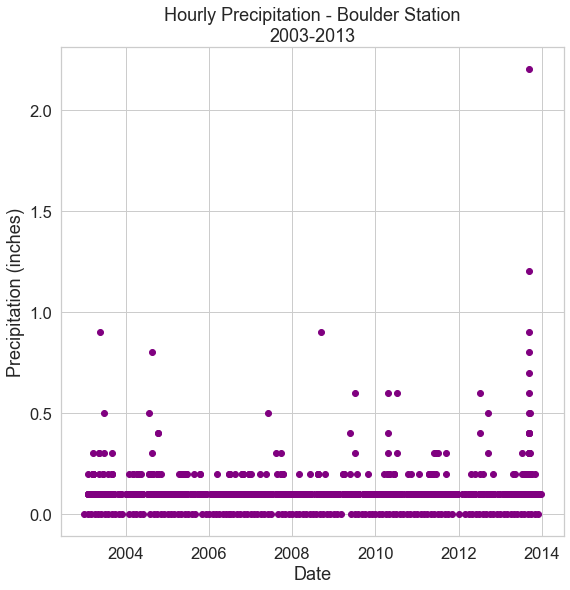

In [6]:
f, ax = plt.subplots(figsize=(9,9))
ax.scatter(precip_2003_2013_hourly.index.values,
           precip_2003_2013_hourly['HPCP'],
           color='purple')
ax.set(xlabel='Date',
       ylabel='Precipitation (inches)',
       title='Hourly Precipitation - Boulder Station\n2003-2013')
plt.show()

In [8]:
precip_2003_2013_daily = precip_2003_2013_hourly.resample('D').sum()

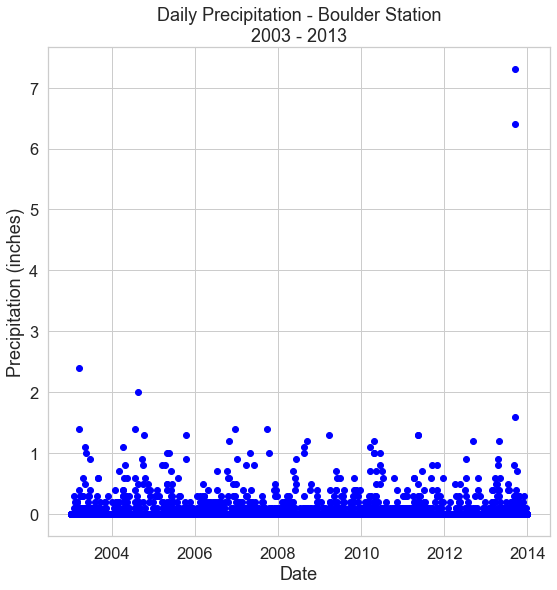

In [11]:
f, ax = plt.subplots(figsize=(9,9))
ax.scatter(precip_2003_2013_daily.index.values,
           precip_2003_2013_daily['HPCP'],
           color='blue')
ax.set(xlabel='Date',
       ylabel='Precipitation (inches)',
       title='Daily Precipitation - Boulder Station\n2003 - 2013')
plt.show()

Resample and plot yearly values directly from daily data

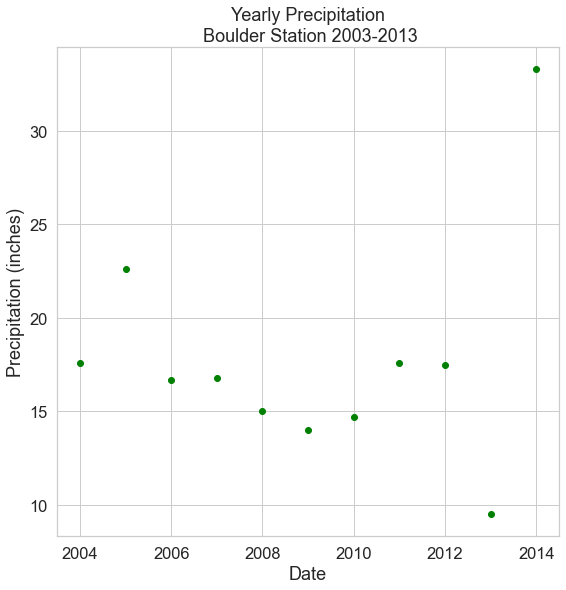

In [12]:
f, ax = plt.subplots(figsize=(9,9))
ax.scatter(precip_2003_2013_hourly.resample('Y').sum().index.values,
           precip_2003_2013_hourly.resample('Y').sum()['HPCP'],
           color='green')
ax.set(xlabel='Date',
       ylabel='Precipitation (inches)',
       title='Yearly Precipitation\n Boulder Station 2003-2013')
plt.show()